In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor()])

dataset = torchvision.datasets.ImageFolder(root='/home/jeet/Downloads/work/SEM-VI/DL/Assignment2/faces94', transform=transform)
print(len(dataset))

3059


In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)
print(len(dataloader))

device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")
print(device)

96
cpu


In [21]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 4),
            nn.BatchNorm2d(8),
            nn.ReLU(True),

            nn.Conv2d(8, 16, 4),
            nn.BatchNorm2d(16),
            nn.ReLU(True),

            nn.Conv2d(16, 32, 4),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 4),
            nn.BatchNorm2d(16),
            nn.ReLU(True),

            nn.ConvTranspose2d(16, 8, 4),
            nn.BatchNorm2d(8),
            nn.ReLU(True),

            nn.ConvTranspose2d(8, 3, 4),
            nn.BatchNorm2d(3),
            nn.ReLU(True),
        )
    
    def forward(self, input):
        out = self.encoder(input)
        return self.decoder(out)
    
    

In [24]:
autoencoder = AutoEncoder().to(device)
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(3, 8, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(8, 16, kernel_size=(4, 4), stride=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(1, 1))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# dataiter = iter(dataloader)
# images, labels = dataiter.next()

# print(images.shape)
# show images
# imshow(torchvision.utils.make_grid(images))

In [26]:
criterion = nn.MSELoss()

lr = 0.0001

optimizerA = torch.optim.Adam(autoencoder.parameters(), lr=lr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0/1][0/96]	


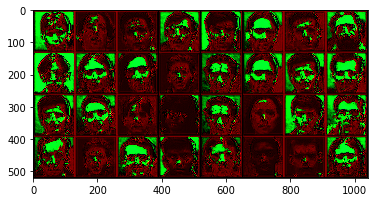

torch.Size([32, 3, 128, 128])


In [29]:
epochs = 1
for epoch in range(epochs):
    for i, data in enumerate(dataloader, 0):
        if i<len(dataloader)-1:
            autoencoder.zero_grad()

            real_cpu = data[0].to(device)
        #     print(autoencoder(real_cpu))
            #imshow(torchvision.utils.make_grid(real_cpu))
            out = autoencoder(real_cpu)
#             print(out.shape)
            #imshow(torchvision.utils.make_grid(out.detach()))

            loss = criterion(out, real_cpu)

            loss.backward()
            optimizerA.step()

            if i%50 == 0 or i==len(dataloader)-2:
                print('[%d/%d][%d/%d]\t' % (epoch, epochs, i, len(dataloader)))
                imshow(torchvision.utils.make_grid(out.detach()))
                print(out.shape)
            break